<a href="https://colab.research.google.com/github/chiusanghung/AI/blob/main/VN_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI/Money_Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('5k'):
    output = 0
  if file.startswith('10k'):
    output = 1
  if file.startswith('20k'):
    output = 2
  if file.startswith('50k'):
    output = 3
  if file.startswith('100k'):
    output = 4
  if file.startswith('500k'):
    output = 5
  photo = load_img(folder + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/Money_Data/Money_photos.npy', photos)
save('/content/drive/MyDrive/AI/Money_Data/Money_labels.npy', labels)

(24, 200, 200, 3) (24,)


In [96]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI/Money_Data/Money_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/Money_Data/Money_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [97]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (200,200,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 200, 200, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 16)      1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 32)       

In [99]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [100]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),epochs=30,validation_data=aug.flow(x_test,y_test,batch_size=len(x_test)))

<ipython-input-100-412a2e019daf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),epochs=30,validation_data=aug.flow(x_test,y_test,batch_size=len(x_test)))


Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.7885 - accuracy: 0.3750 - val_loss: 1.8251 - val_accuracy: 0.1250
Epoch 2/30
1/1 [==============================] - 0s 261ms/step - loss: 1.7583 - accuracy: 0.3125 - val_loss: 2.0085 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 261ms/step - loss: 1.7319 - accuracy: 0.3750 - val_loss: 1.9609 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 268ms/step - loss: 1.8182 - accuracy: 0.1250 - val_loss: 2.1150 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 261ms/step - loss: 1.9589 - accuracy: 0.1875 - val_loss: 1.9286 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 261ms/step - loss: 1.7369 - accuracy: 0.1875 - val_loss: 1.8322 - val_accuracy: 0.1250
Epoch 7/30
1/1 [==============================] - 0s 260ms/step - loss: 1.7685 - accuracy: 0.1250 - val_loss: 1.8362 - val_accuracy: 0.1250
Epoch 8

In [101]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

1/1 [==============================] - 0s 35ms/step - loss: 340.4385 - accuracy: 0.1250
Accuracy: 0.125
Loss: 340.43853759765625


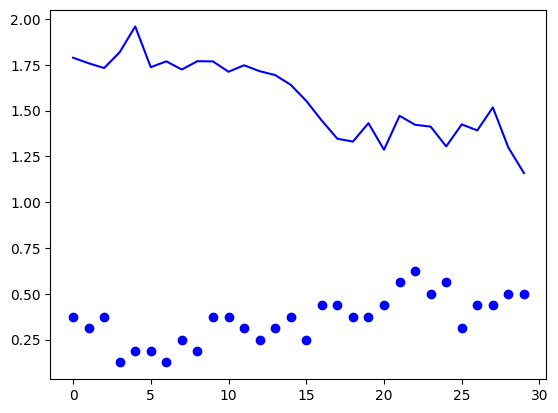

In [102]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [103]:
from keras.models import load_model
model.save('/content/drive/MyDrive/AI/Models/Tien.h5')
model = load_model('/content/drive/MyDrive/AI/Models/Tien.h5')

1/1 [==============================] - 0s 150ms/step
Menh gia: 100k


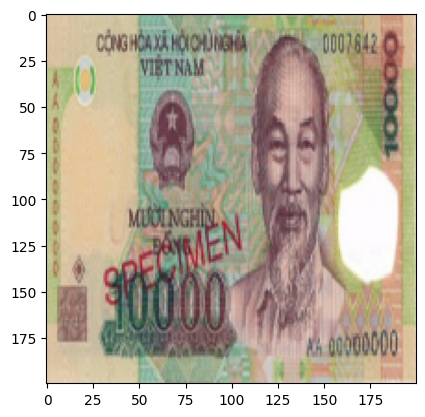

1/1 [==============================] - 0s 21ms/step
Menh gia: 100k


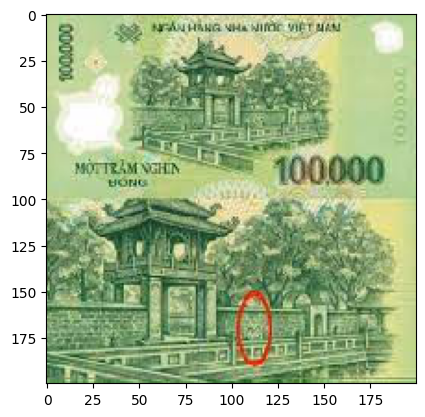

1/1 [==============================] - 0s 20ms/step
Menh gia: 100k


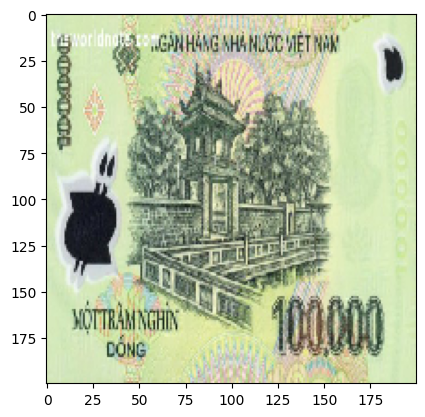

1/1 [==============================] - 0s 25ms/step
Menh gia: 100k


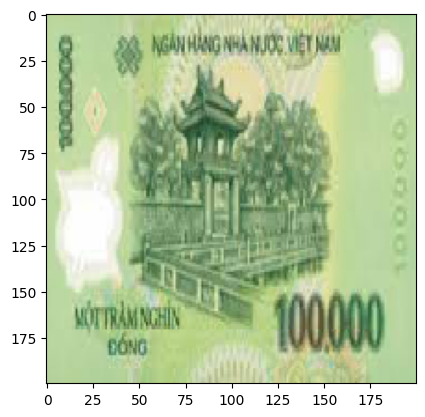

1/1 [==============================] - 0s 19ms/step
Menh gia: 100k


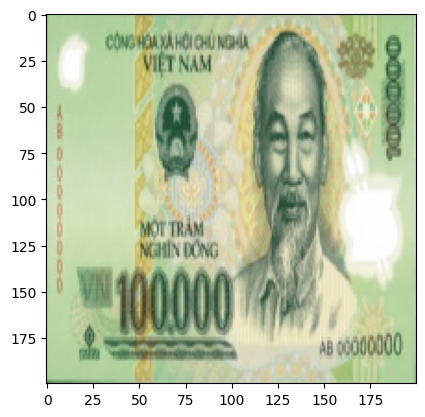

1/1 [==============================] - 0s 21ms/step
Menh gia: 50k


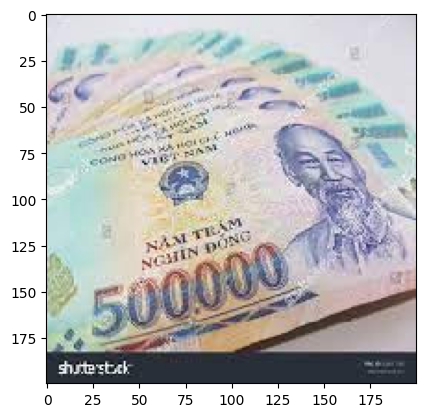

1/1 [==============================] - 0s 21ms/step
Menh gia: 20k


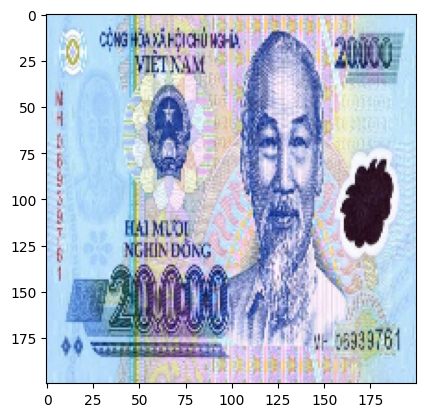

1/1 [==============================] - 0s 23ms/step
Menh gia: 20k


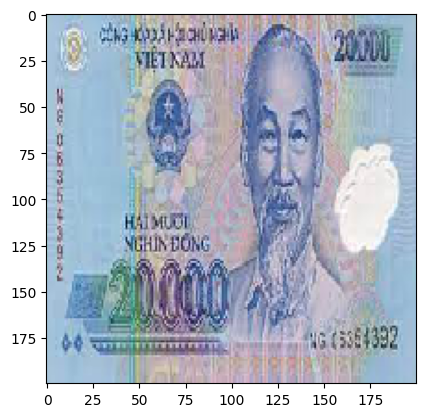

1/1 [==============================] - 0s 20ms/step
Menh gia: 20k


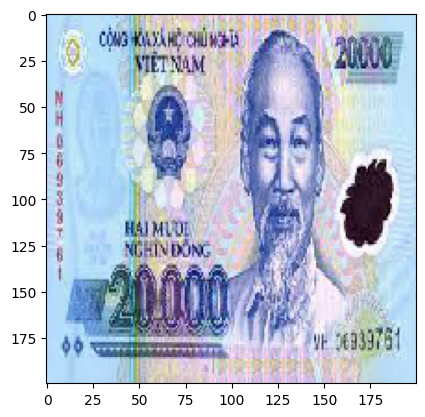

1/1 [==============================] - 0s 18ms/step
Menh gia: 100k


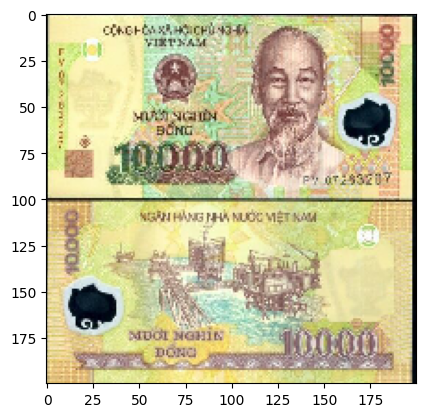

1/1 [==============================] - 0s 28ms/step
Menh gia: 100k


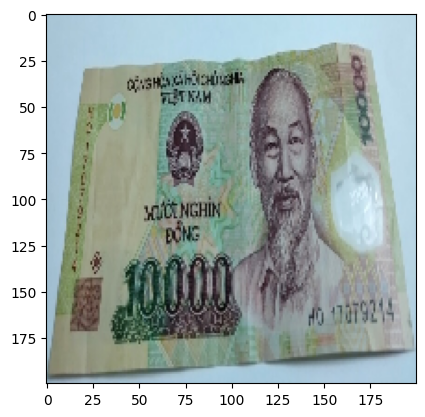

1/1 [==============================] - 0s 29ms/step
Menh gia: 20k


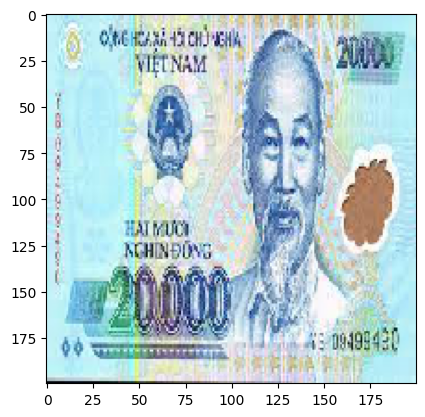

1/1 [==============================] - 0s 23ms/step
Menh gia: 20k


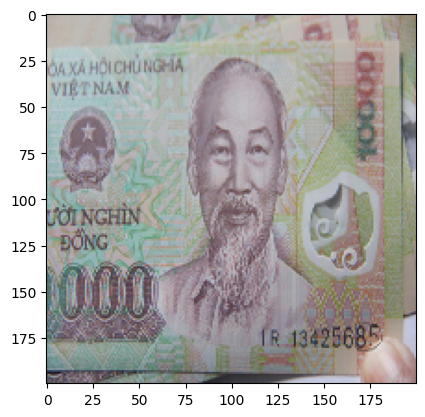

1/1 [==============================] - 0s 28ms/step
Menh gia: 20k


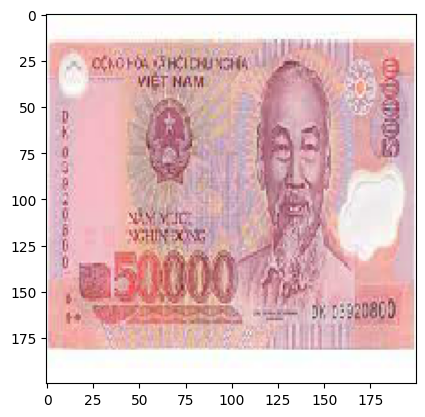

1/1 [==============================] - 0s 23ms/step
Menh gia: 20k


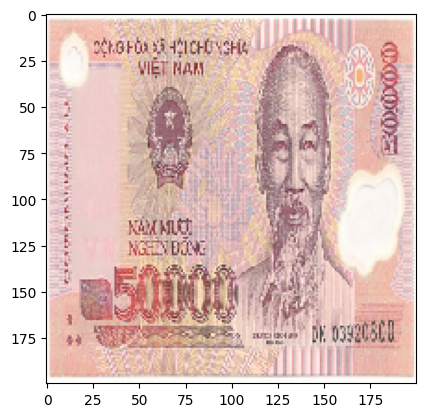

1/1 [==============================] - 0s 31ms/step
Menh gia: 50k


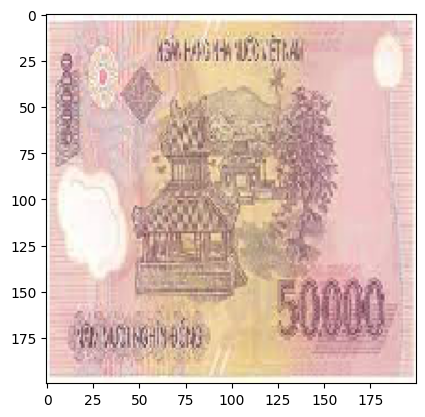

1/1 [==============================] - 0s 22ms/step
Menh gia: 20k


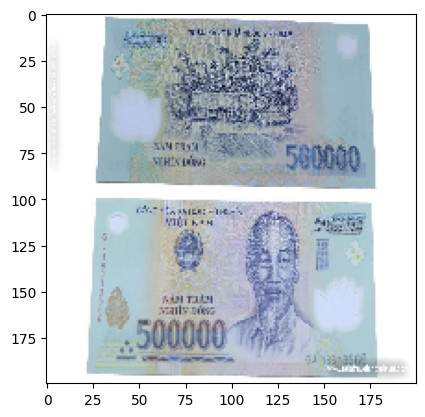

1/1 [==============================] - 0s 24ms/step
Menh gia: 20k


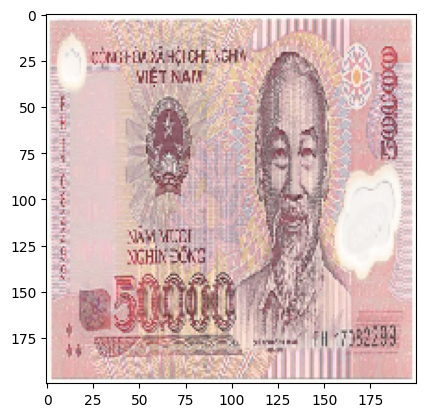

1/1 [==============================] - 0s 37ms/step
Menh gia: 100k


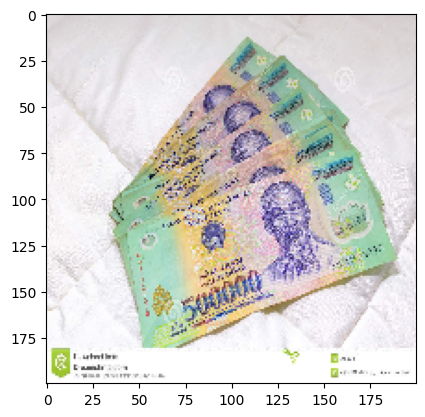

1/1 [==============================] - 0s 30ms/step
Menh gia: 20k


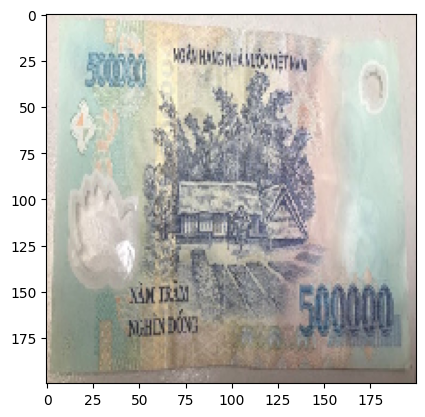

1/1 [==============================] - 0s 27ms/step
Menh gia: 20k


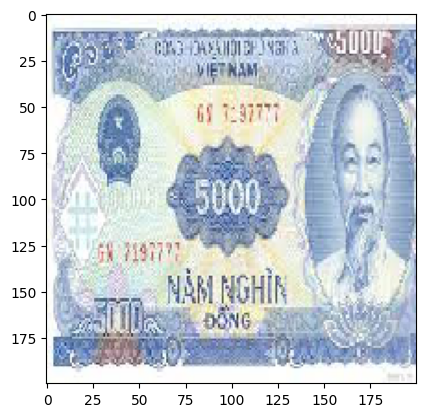

1/1 [==============================] - 0s 32ms/step
Menh gia: 20k


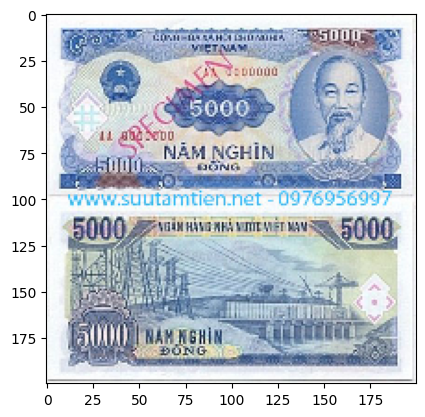

1/1 [==============================] - 0s 26ms/step
Menh gia: 20k


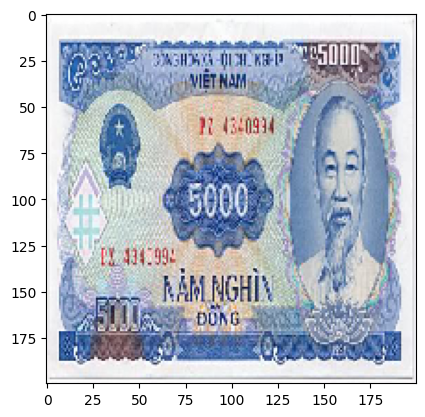

1/1 [==============================] - 0s 29ms/step
Menh gia: 20k


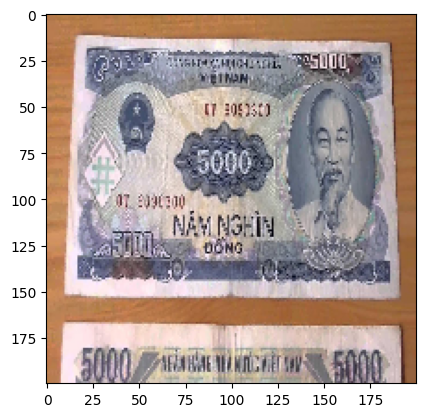

UnidentifiedImageError: ignored

In [105]:
from pylab import *
url = '/content/drive/MyDrive/AI/Money_Data'
for i in listdir(url):
  img = load_img(url + '/' + i, target_size = (200,200))
  imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,200,200,3)
  img = img.astype('float32')
  img = img/255
  a = model.predict(img).argmax()
  class_name = ['Menh gia: 5k', 'Menh gia: 10k', 'Menh gia: 20k', 'Menh gia: 50k','Menh gia: 100k','Menh gia: 500k']
  print(class_name[a])
  plt.show()